In [78]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [79]:
df = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-k-alibekov/personal/csv_files/games.csv')

In [80]:
df.shape

(16598, 11)

In [81]:
df.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [82]:
df = df.dropna()

In [83]:
df.shape

(16291, 11)

In [84]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [85]:
# df['Year'] = pd.to_datetime(df['Year'])

In [86]:
df.dtypes

Rank              int64
Name             object
Platform         object
Year            float64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object

In [87]:
df.Year.describe()

count    16291.000000
mean      2006.405561
std          5.832412
min       1980.000000
25%       2003.000000
50%       2007.000000
75%       2010.000000
max       2020.000000
Name: Year, dtype: float64

In [88]:
df.Year.mode()

0    2009.0
dtype: float64

In [89]:
games_per_year = df.groupby('Year', as_index = False).agg({'Name':'count'})

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38]),
 <a list of 39 Text major ticklabel objects>)

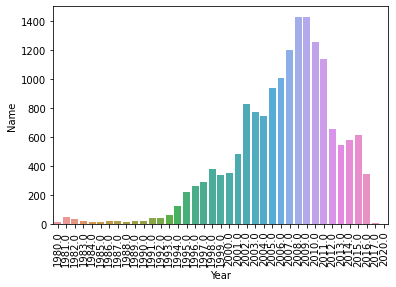

In [90]:
sns.barplot(data = games_per_year, x = 'Year', y = 'Name')
plt.xticks(rotation=90)

In [91]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [92]:
df_platform = df.groupby('Platform', as_index=False).agg({'Rank':'count'}).sort_values(by='Rank', ascending=False)

In [93]:
df_platform.head()

,Platform,Rank
4,DS,2131
16,PS2,2127
17,PS3,1304
26,Wii,1290
28,X360,1234


In [94]:
df_platform.Rank.sum()

16291

In [95]:
df_platform['Frequency'] = df_platform.Rank / df_platform.Rank.sum()

In [96]:
df_platform.query('Frequency > 0.07')

,Platform,Rank,Frequency
4,DS,2131,0.130808
16,PS2,2127,0.130563
17,PS3,1304,0.080044
26,Wii,1290,0.079185
28,X360,1234,0.075747
19,PSP,1197,0.073476
15,PS,1189,0.072985


In [97]:
df_publisher = df.groupby('Publisher', as_index=False).agg({'Rank':'count'}).sort_values(by='Rank', ascending=False)

In [98]:
df_publisher

,Publisher,Rank
138,Electronic Arts,1339
21,Activision,966
347,Namco Bandai Games,928
524,Ubisoft,918
275,Konami Digital Entertainment,823
...,...,...
149,Ertain,1
147,Epic Games,1
447,Seventh Chord,1
145,Enjoy Gaming ltd.,1


In [99]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [100]:
df.query('Publisher == "Nintendo"').agg(['mean', 'median', 'std'])

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
mean,3801.864943,2003.83046,1.172055,0.601006,0.653721,0.136767,2.563836
median,2262.000000,2005.00000,0.375000,0.120000,0.280000,0.030000,0.920000
std,3969.268372,7.77637,2.989913,1.743953,1.063110,0.464170,5.676925


In [107]:
df_japan = df.query('Publisher == "Nintendo"')

In [108]:
df_japan

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16269,16272,Slide Adventure: Mag Kid,DS,2007.0,Action,Nintendo,0.00,0.00,0.01,0.00,0.01
16357,16360,Mario vs. Donkey Kong: Tipping Stars,WiiU,2015.0,Puzzle,Nintendo,0.00,0.00,0.01,0.00,0.01
16456,16459,Art Academy: Home Studio,WiiU,2015.0,Misc,Nintendo,0.00,0.00,0.01,0.00,0.01
16473,16476,Captain Rainbow,Wii,2008.0,Adventure,Nintendo,0.00,0.00,0.01,0.00,0.01


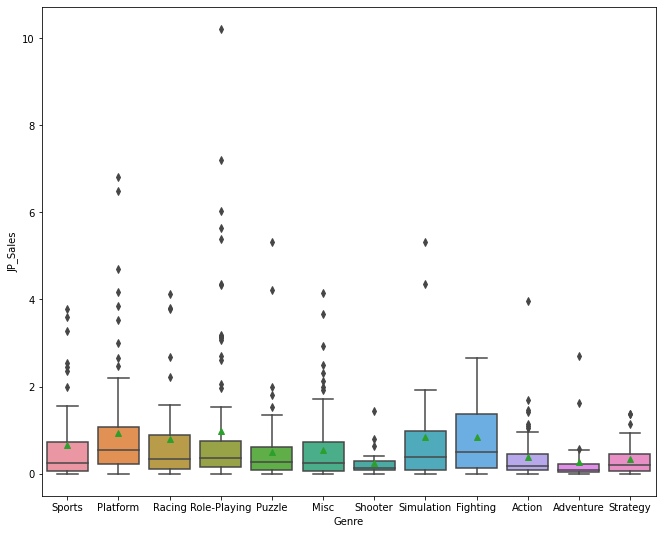

In [109]:
plt.figure(figsize=(11,9))
sns.boxplot(data = df_japan, x = 'Genre', y = 'JP_Sales', showmeans = True)

In [110]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [124]:
df_5_genre = df.query('Publisher == "Nintendo"' and "Genre in ('Fighting', 'Simulation', 'Platform', 'Racing', 'Sports')").groupby(['Year', 'Genre'], as_index=False).agg({'JP_Sales':'sum'})
df_5_genre

,Year,Genre,JP_Sales
0,1980.0,Fighting,0.00
1,1980.0,Sports,0.00
2,1981.0,Platform,0.00
3,1981.0,Racing,0.00
4,1981.0,Simulation,0.00
...,...,...,...
160,2016.0,Platform,0.11
161,2016.0,Racing,0.01
162,2016.0,Simulation,0.30
163,2016.0,Sports,0.78


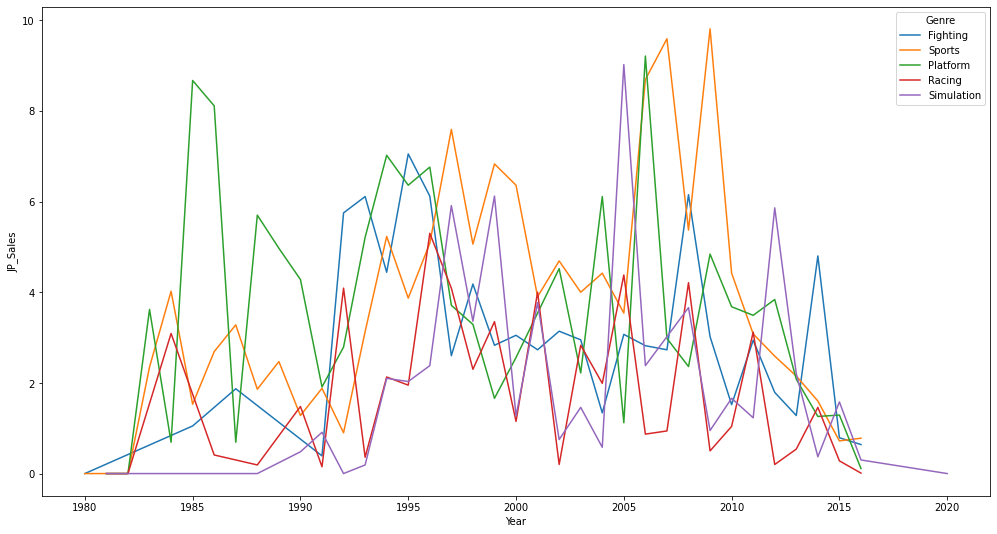

In [128]:
plt.figure(figsize=(17,9))
sns.lineplot(data = df_5_genre, x = 'Year', y = 'JP_Sales', hue='Genre')